In [19]:
#evaluate ekman pumping in easterlies experiment

In [20]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import xarray as xr
import cmocean.cm as cmocean
import glob

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client
import matplotlib.path as mpath
import datetime as dt
import xgcm

import xesmf
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [21]:
client = Client()
client

<Client: 'tcp://127.0.0.1:37461' processes=4 threads=4, memory=100.00 GiB>

In [22]:
# database for control simulation:
master_session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')

In [23]:
from cosima_cookbook import explore
dbx = explore.DatabaseExplorer #(session=session)
dbx

cosima_cookbook.explore.DatabaseExplorer

In [24]:
ee = explore.ExperimentExplorer(session=master_session, experiment='01deg_jra55v13_ryf9091')
ee

ExperimentExplorer(children=(HTML(value='\n            <h3>Experiment Explorer</h3>\n\n            <p>Select a…

In [25]:
import cartopy.feature as cft
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                   edgecolor='black', facecolor='gray', linewidth=0.5)

In [26]:
expt='01deg_jra55v140_iaf'
variable='tmask'
tmask = cc.querying.getvar('01deg_jra55v140_iaf','ht',master_session,n=1).sel(yt_ocean=slice(-90,-55))
#ht = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
tmask.load()
print(tmask.shape)

expt='01deg_jra55v140_iaf'
variable='ht'
ht = cc.querying.getvar('01deg_jra55v140_iaf','ht',master_session,n=1).sel(yt_ocean=slice(-90,-55))
#ht = cc.querying.getvar(expt,variable,session, n=-1).fillna(1.0).astype(int) - 1
ht.load()
print(ht.shape)

expt='01deg_jra55v140_iaf'
variable='xt_ocean'
xt_ocean = cc.querying.getvar(expt,variable,master_session, n=-1).fillna(1.0).astype(int) - 1
xt_ocean.load()
print(xt_ocean.shape)

expt='01deg_jra55v140_iaf'
variable='yt_ocean'
yt_ocean = cc.querying.getvar(expt,variable,master_session, n=-1).fillna(1.0).astype(int) - 1
yt_ocean.load()
print(yt_ocean.shape)

variable='area_t'
area_t = cc.querying.getvar(expt,variable,master_session, n=-1).fillna(1.0).astype(int) - 1
area_t.load()
print(area_t.shape)

variable='geolon_t'
geolon_t = cc.querying.getvar(expt,variable,master_session, n=-1).fillna(1.0).astype(int) - 1
geolon_t.load()
print(geolon_t.shape)

variable='geolat_t'
geolat_t = cc.querying.getvar(expt,variable,master_session, n=-1).fillna(1.0).astype(int) - 1
geolat_t.load()
print(geolat_t.shape)

variable='geolon_c'
geolon_c = cc.querying.getvar(expt,variable,master_session, n=-1).fillna(1.0).astype(int) - 1
geolon_c.load()
print(geolon_c.shape)

variable='geolat_c'
geolat_c = cc.querying.getvar(expt,variable,master_session, n=-1).fillna(1.0).astype(int) - 1
geolat_c.load()
print(geolat_c.shape)

variable='xu_ocean'
xu_ocean = cc.querying.getvar(expt,variable,master_session, n=-1).fillna(1.0).astype(int) - 1
xu_ocean.load()
print(xu_ocean.values)

variable='yu_ocean'
yu_ocean = cc.querying.getvar(expt,variable,master_session, n=-1).fillna(1.0).astype(int) - 1
yu_ocean.load()
print(yu_ocean.shape)

variable='area_u'
area_u = cc.querying.getvar(expt,variable,master_session, n=-1).fillna(1.0).astype(int) - 1
area_u.load()
print(area_u.shape)

variable='dxt'
dxt = cc.querying.getvar(expt,variable,master_session, n=-1).fillna(1.0).astype(int) - 1
dxt.load()
print(dxt.shape)

variable='dyt'
dyt = cc.querying.getvar(expt,variable,master_session, n=-1).fillna(1.0).astype(int) - 1
dyt.load()
print(dyt.shape)

variable='dxu'
dxu = cc.querying.getvar(expt,variable,master_session, n=-1).fillna(1.0).astype(int) - 1
dxu.load()
print(dxu.shape)

variable='dyu'
dyu = cc.querying.getvar(expt,variable,master_session, n=-1).fillna(1.0).astype(int) - 1
dyu.load()
print(dyu.shape)


(584, 3600)
(584, 3600)
(3600,)
(2700,)
(2700, 3600)
(2700, 3600)
(2700, 3600)
(2700, 3600)
(2700, 3600)
[-280 -280 -280 ...   78   78   79]
(2700,)
(2700, 3600)
(2700, 3600)
(2700, 3600)
(2700, 3600)
(2700, 3600)


from netCDF4 import Dataset # to work with NetCDF files
hgrid_file ='/g/data3/hh5/tmp/pas561/mom01_unmasked_ocean_grid.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
nc.variables['f_coriolis'][:]
nc.close() # close the file
#fcor=fcor
print(fcor.shape)
#f=xr.open_dataset(hgrid_file,engine='netcdf4',decode_times=False)
#fcor = f.f_coriolis.load()


In [27]:
# these are the values used by MOM5
Ω = 7.292e-5     # Earth's rotation rate in radians/s
Rearth = 6371.e3 # Earth's radius in m

f = 2 * Ω * np.sin(np.deg2rad(geolat_c)) # convert lat in radians
f = f.rename('Coriolis')
f.attrs['long_name'] = 'Coriolis parameter'
f.attrs['units'] = 's-1'
f.attrs['coordinates'] = 'geolon_c geolat_c'

In [28]:
print(f.shape)

(2700, 3600)


In [29]:
# database for control simulation:
master_session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
control = '01deg_jra55v13_ryf9091'

# database for perturbations:
easterlies_session = cc.database.create_session('/g/data/v45/akm157/model_data/access-om2/01deg_jra55v13_ryf9091_easterlies_up10/easterlies.db')
# 10% increase in easterly wind speed:
easterlies_up = '01deg_jra55v13_ryf9091_easterlies_up10'
# 10% decrease in easterly wind speed:
easterlies_down = '01deg_jra55v13_ryf9091_easterlies_down10'

# plot anomalies for last 5 years of simulation:
start_time='2160-01-01'
end_time='2164-12-31'

# pick the northern latitude, so there are an equal number of t-cell and u-cell gridpoint in this range:
lat_slice  = slice(-82,90.0) #-50.04

In [30]:
# topography data for plotting:
ht = cc.querying.getvar(control,'ht' , master_session,n=1).sel(yt_ocean=lat_slice)
land_mask = np.squeeze(ht.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)

#Compute Ekman pumping
Note that this is lazy time averaging (i.e. does not account for number of days in each month). This should be fixed for final paper figures.

In [31]:
tau_x_con = cc.querying.getvar(control, 'tau_x', master_session, ncfile='ocean_month.nc',start_time=start_time, end_time=end_time)
tau_x_con = tau_x_con.sel(time=slice(start_time,end_time)).mean('time').sel(yu_ocean=lat_slice)
tau_x_con = tau_x_con.load()

tau_y_con = cc.querying.getvar(control, 'tau_y', master_session, ncfile='ocean_month.nc',start_time=start_time, end_time=end_time)
tau_y_con = tau_y_con.sel(time=slice(start_time,end_time)).mean('time').sel(yu_ocean=lat_slice)
tau_y_con = tau_y_con.load()

tau_x_up = cc.querying.getvar(easterlies_up, 'tau_x', easterlies_session, ncfile='ocean_month.nc',start_time=start_time, end_time=end_time)
tau_x_up = tau_x_up.sel(time=slice(start_time,end_time)).mean('time').sel(yu_ocean=lat_slice)
tau_x_up = tau_x_up.load()

tau_y_up = cc.querying.getvar(easterlies_up, 'tau_y', easterlies_session, ncfile='ocean_month.nc',start_time=start_time, end_time=end_time)
tau_y_up = tau_y_up.sel(time=slice(start_time,end_time)).mean('time').sel(yu_ocean=lat_slice)
tau_y_up = tau_y_up.load()

tau_x_down = cc.querying.getvar(easterlies_down, 'tau_x', easterlies_session, ncfile='ocean_month.nc',start_time=start_time, end_time=end_time)
tau_x_down = tau_x_down.sel(time=slice(start_time,end_time)).mean('time').sel(yu_ocean=lat_slice)
tau_x_down = tau_x_down.load()

tau_y_down = cc.querying.getvar(easterlies_down, 'tau_y', easterlies_session, ncfile='ocean_month.nc',start_time=start_time, end_time=end_time)
tau_y_down = tau_y_down.sel(time=slice(start_time,end_time)).mean('time').sel(yu_ocean=lat_slice)
tau_y_down = tau_y_down.load()


In [32]:
#Ekman pumping calc ... method 2
#https://cosima-recipes.readthedocs.io/en/latest/documented_examples/RelativeVorticity.html#gallery-documented-examples-relativevorticity-ipynb
#https://github.com/adele157/easterlies-collaborative-project/blob/master/notebooks/Ekman_pumping/Ekman_pumping_zoomed_Adele.ipynb

# Need to use these unmasked dxu and dyu, because otherwise it spreads the mask and we miss the Ekman pumping in the first ocean cell.

tau_x_con_full = cc.querying.getvar(control, 'tau_x', master_session, ncfile='ocean_month.nc',start_time=start_time, end_time=end_time)
dyu = cc.querying.getvar(control, 'dyu', master_session, n=1)
dyu['ni'] = tau_x_con_full['xu_ocean'].values
dyu['nj'] = tau_x_con_full['yu_ocean'].values
dyu = dyu.rename(({'ni':'xu_ocean', 'nj':'yu_ocean'}))
dyu = dyu.sel(yu_ocean=lat_slice)

dxu = cc.querying.getvar(control, 'dxu', master_session, n=1)
dxu['ni'] = tau_x_con_full['xu_ocean'].values
dxu['nj'] = tau_x_con_full['yu_ocean'].values
dxu = dxu.rename(({'ni':'xu_ocean', 'nj':'yu_ocean'}))
dxu = dxu.sel(yu_ocean=lat_slice)

In [33]:
# See https://cosima-recipes.readthedocs.io/en/latest/documented_examples/RelativeVorticity.html#gallery-documented-examples-relativevorticity-ipynb
#ds = xr.open_mfdataset('/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output000/ocean/ocean_grid.nc', combine='by_coords')
#inverse_dxtn = 0.5*(1/ds.dxu + np.roll(1/ds.dxu, 1, axis=1))
#inverse_dyte = 0.5*(1/ds.dyu + np.roll(1/ds.dyu, 1, axis=1))

# use dyu from above, because otherwise the nans from land spread:
inverse_dyte = 0.5*(1/dyu + np.roll(1/dyu, 1, axis=0))
inverse_dxtn = 0.5*(1/dxu + np.roll(1/dxu, 1, axis=0))

# fill land with zeros:
tauy_f_con = tau_y_con/f
tauy_f_con = tauy_f_con.fillna(0)
taux_f_con = tau_x_con/f
taux_f_con = taux_f_con.fillna(0)
tauy_f_up = tau_y_up/f
tauy_f_up = tauy_f_up.fillna(0)
taux_f_up = tau_x_up/f
taux_f_up = taux_f_up.fillna(0)
tauy_f_down = tau_y_down/f
tauy_f_down = tauy_f_down.fillna(0)
taux_f_down = tau_x_down/f
taux_f_down = taux_f_down.fillna(0)

# compute derivatives:
d_dx_tauyf_con = (tauy_f_con - np.roll(tauy_f_con, 1, axis=1))*inverse_dxtn
d_dy_tauxf_con = (taux_f_con - np.roll(taux_f_con, 1, axis=0))*inverse_dyte
d_dx_tauyf_up = (tauy_f_up - np.roll(tauy_f_up, 1, axis=1))*inverse_dxtn
d_dy_tauxf_up = (taux_f_up - np.roll(taux_f_up, 1, axis=0))*inverse_dyte
d_dx_tauyf_down = (tauy_f_down - np.roll(tauy_f_down, 1, axis=1))*inverse_dxtn
d_dy_tauxf_down = (taux_f_down - np.roll(taux_f_down, 1, axis=0))*inverse_dyte

# interpolate onto the same grid:
d_dx_tauyf_con = 0.5 * (d_dx_tauyf_con + np.roll(d_dx_tauyf_con, 1, axis=0))
d_dy_tauxf_con = 0.5 * (d_dy_tauxf_con + np.roll(d_dy_tauxf_con, 1, axis=1))
d_dx_tauyf_up = 0.5 * (d_dx_tauyf_up + np.roll(d_dx_tauyf_up, 1, axis=0))
d_dy_tauxf_up = 0.5 * (d_dy_tauxf_up + np.roll(d_dy_tauxf_up, 1, axis=1))
d_dx_tauyf_down = 0.5 * (d_dx_tauyf_down + np.roll(d_dx_tauyf_down, 1, axis=0))
d_dy_tauxf_down = 0.5 * (d_dy_tauxf_down + np.roll(d_dy_tauxf_down, 1, axis=1))

# compute curl:
curl_tauf_con = d_dx_tauyf_con - d_dy_tauxf_con
curl_tauf_con = curl_tauf_con.load()
curl_tauf_up = d_dx_tauyf_up - d_dy_tauxf_up
curl_tauf_up = curl_tauf_up.load()
curl_tauf_down = d_dx_tauyf_down - d_dy_tauxf_down
curl_tauf_down = curl_tauf_down.load()

#convert from m/s to m/day
s_day=60*60*24
rho0 = 1035.
ekman_con = curl_tauf_con/rho0*s_day
ekman_up = curl_tauf_up/rho0*s_day
ekman_down = curl_tauf_down/rho0*s_day

# mask land:
ekman_con = ekman_con.where(ekman_con!=0)
ekman_up = ekman_up.where(ekman_up!=0)
ekman_down = ekman_down.where(ekman_down!=0)


In [34]:
# Change coords to t grid:
ekman_con['xu_ocean'] = ht['xt_ocean'].values
ekman_con['yu_ocean'] = ht['yt_ocean'].values
ekman_con = ekman_con.rename(({'xu_ocean':'xt_ocean', 'yu_ocean':'yt_ocean'}))

ekman_up['xu_ocean'] = ht['xt_ocean'].values
ekman_up['yu_ocean'] = ht['yt_ocean'].values
ekman_up = ekman_up.rename(({'xu_ocean':'xt_ocean', 'yu_ocean':'yt_ocean'}))

ekman_down['xu_ocean'] = ht['xt_ocean'].values
ekman_down['yu_ocean'] = ht['yt_ocean'].values
ekman_down = ekman_down.rename(({'xu_ocean':'xt_ocean', 'yu_ocean':'yt_ocean'}))

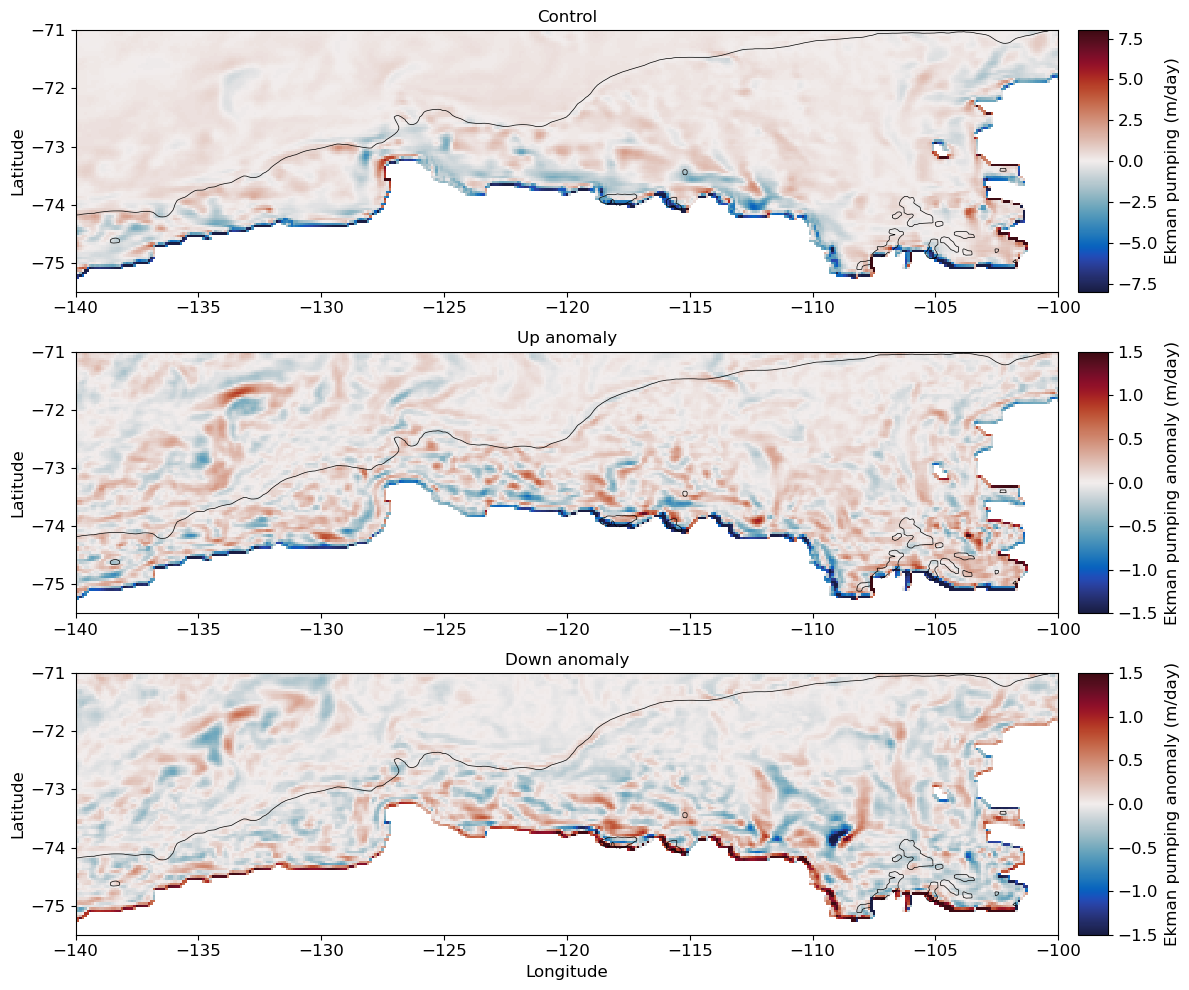

In [35]:
fontsize=12

plt.figure(figsize=(12,10))

plt.subplot(3,1,1)
plt.title('Control',fontsize=fontsize)
pc=plt.pcolormesh(ekman_con.xt_ocean,ekman_con.yt_ocean,ekman_con,cmap=cmocean.balance,vmin=-8,vmax=8)
plt.ylim(-75.5,-71)
plt.xlim(-140,-100)
plt.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000],colors='k',linewidths=.5)
#plt.xlabel('Longitude',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.ylabel('Latitude',fontsize=fontsize)
#plt.contourf(ht.xt_ocean, ht.yt_ocean,land_mask,colors='grey')
# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(pc, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Ekman pumping (m/day)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

plt.subplot(3,1,2)
plt.title('Up anomaly',fontsize=fontsize)
pc=plt.pcolormesh(ekman_con.xt_ocean,ekman_con.yt_ocean,ekman_up-ekman_con,cmap=cmocean.balance,vmin=-1.5,vmax=1.5)
plt.ylim(-75.5,-71)
plt.xlim(-140,-100)
plt.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000],colors='k',linewidths=.5)
#plt.xlabel('Longitude',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.ylabel('Latitude',fontsize=fontsize)
# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(pc, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Ekman pumping anomaly (m/day)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

plt.subplot(3,1,3)
plt.title('Down anomaly',fontsize=fontsize)
pc=plt.pcolormesh(ekman_con.xt_ocean,ekman_con.yt_ocean,ekman_down-ekman_con,cmap=cmocean.balance,vmin=-1.5,vmax=1.5)
plt.ylim(-75.5,-71)
plt.xlim(-140,-100)
plt.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000],colors='k',linewidths=.5)
plt.xlabel('Longitude',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.ylabel('Latitude',fontsize=fontsize)
# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(pc, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Ekman pumping anomaly (m/day)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

plt.tight_layout()

#figure_path = figdir+'/Ekman_pumping_Amundsen_zoom_yrs_2050_2164.png'
#plt.savefig(figure_path, dpi=250,bbox_inches='tight', pad_inches=0.1,facecolor='white')


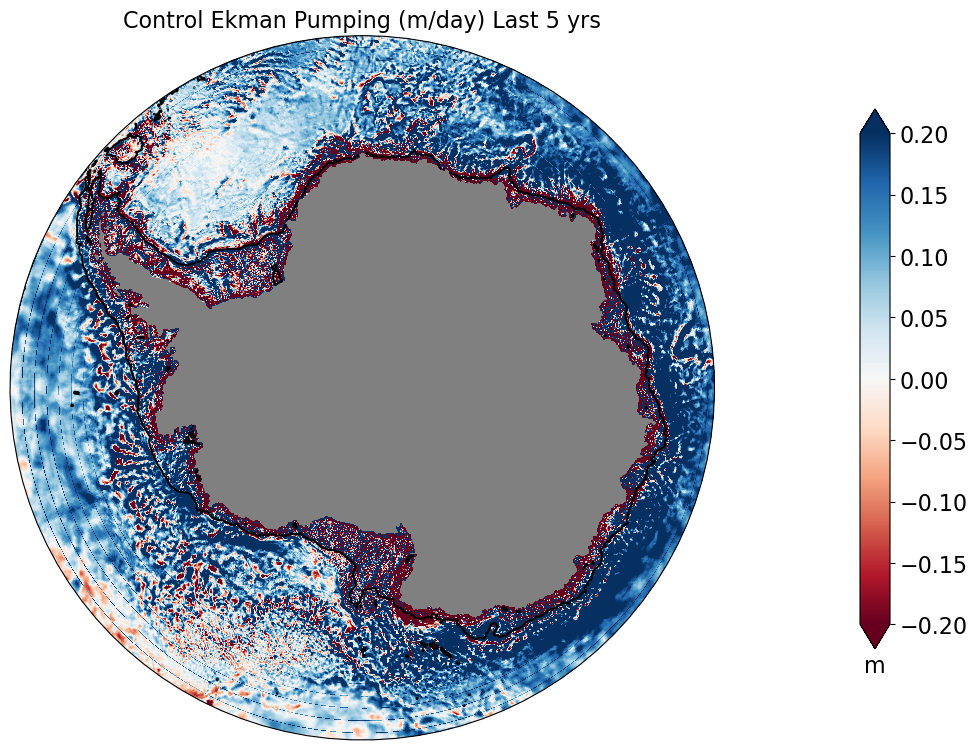

In [36]:
fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(1,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([-280, 80, -80, -60], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

a=ekman_con

p1 = a.plot.pcolormesh(x='xt_ocean', y='yt_ocean',vmin=-.2, vmax=.2, add_colorbar=False, cmap=plt.cm.RdBu, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=[1000], colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

#av=tauy_con
#au=taux_con

#p2=ax.quiver(xt_ocean.values, yt_ocean[0:740].values, au.values, av.values,regrid_shape=50,transform=ccrs.PlateCarree())

tit='Control Ekman Pumping (m/day) Last 5 yrs'
plt.title(tit,fontsize = 16)

#rect = [left, bottom, width, height]
ax_cb = plt.axes([.55, 0.35, 0.015, 0.3])
cb = plt.colorbar(p1,cax=ax_cb,orientation='vertical', extend='both', shrink=0.5)
cb.ax.set_xlabel('m',fontsize=16);
cb.ax.tick_params(labelsize=16) 
    
plt.tight_layout()

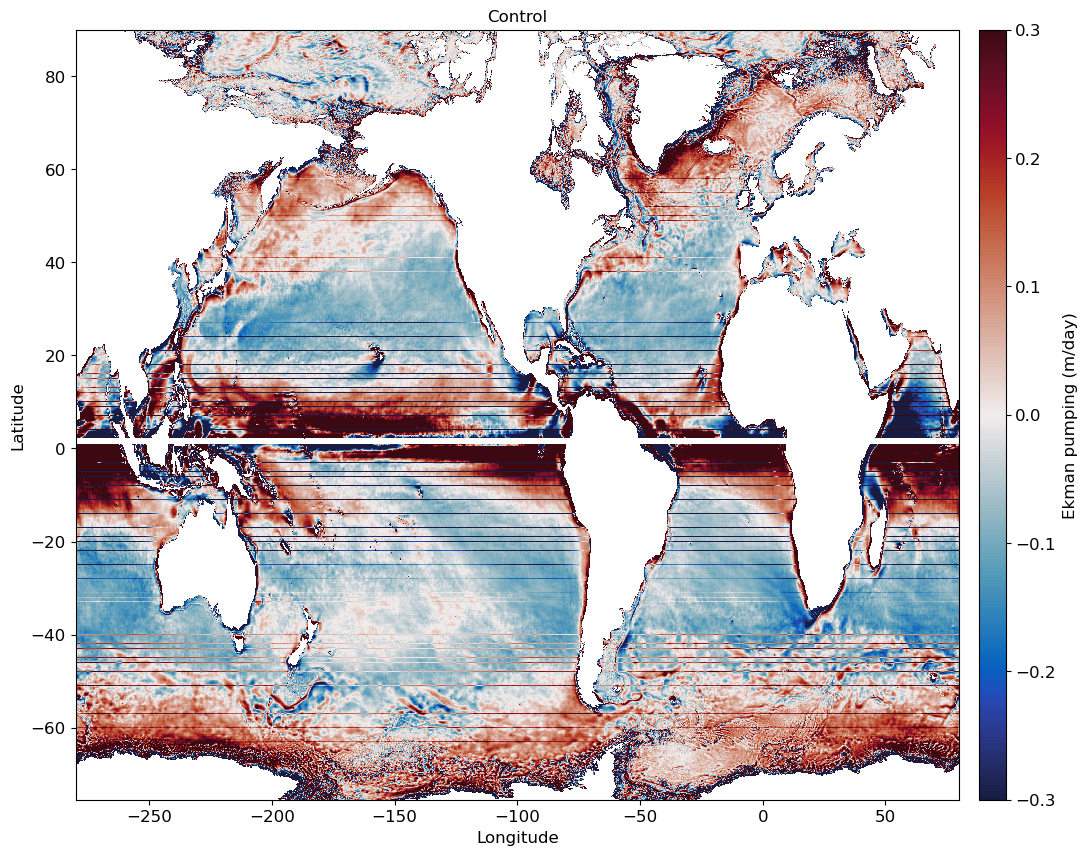

In [40]:
fontsize=12

plt.figure(figsize=(12,10))

plt.subplot(1,1,1)
plt.title('Control',fontsize=fontsize)
pc=plt.pcolormesh(ekman_con.xt_ocean,ekman_con.yt_ocean,ekman_con,cmap=cmocean.balance,vmin=-.3,vmax=.3)
plt.ylim(-75.5,90)
plt.xlim(-280,80)
#plt.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000],colors='k',linewidths=.5)
plt.xlabel('Longitude',fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.ylabel('Latitude',fontsize=fontsize)
#plt.contourf(ht.xt_ocean, ht.yt_ocean,land_mask,colors='grey')
# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(pc, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Ekman pumping (m/day)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

In [42]:
#Ekman pumping calc ... method 3
#Errror here on ocean grid cell next to land - due to nans dut on land 
#https://cosima-recipes.readthedocs.io/en/latest/documented_examples/RelativeVorticity.html#gallery-documented-examples-relativevorticity-ipynb

folder = '/g/data/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_iaf/output001/ocean/'
grid = xr.open_mfdataset(folder+'ocean_grid.nc', combine='by_coords')

ds_con = xr.merge([taux_con, tauy_con, grid])
ds_con.coords['xt_ocean'].attrs.update(axis='X')
ds_con.coords['xu_ocean'].attrs.update(axis='X', c_grid_axis_shift=0.5)
ds_con.coords['yt_ocean'].attrs.update(axis='Y')
ds_con.coords['yu_ocean'].attrs.update(axis='Y', c_grid_axis_shift=0.5)

grid_con = xgcm.Grid(ds_con, periodic=['X'])

rho0=1034
we_con_xgcm = ( grid_con.interp( grid_con.diff(ds_con.tau_y/f, 'X') / grid_con.interp(ds_con.dxu, 'X'), 'Y', boundary='extend')
          - grid_con.interp( grid_con.diff(ds_con.tau_x/f, 'Y', boundary='extend') / grid_con.interp(ds_con.dyt, 'X'), 'X') )/rho0

#convert from m/s to m/day
s_day=60*60*24
we_con_xgcm=we_con_xgcm*s_day

we_con_xgcm = we_con_xgcm.rename('Ekman Pumping')
we_con_xgcm.attrs['long_name'] = 'Ekman Pumping, (d(Tau_y/f) /dx - d(Tau_x/f) / dy) /rho_0'
we_con_xgcm.attrs['units'] = 'm/day'

In [16]:
ds_up = xr.merge([taux_up, tauy_up, grid])
ds_up.coords['xt_ocean'].attrs.update(axis='X')
ds_up.coords['xu_ocean'].attrs.update(axis='X', c_grid_axis_shift=0.5)
ds_up.coords['yt_ocean'].attrs.update(axis='Y')
ds_up.coords['yu_ocean'].attrs.update(axis='Y', c_grid_axis_shift=0.5)

grid_up = xgcm.Grid(ds_up, periodic=['X'])

rho0=1034
we_up_xgcm = ( grid_up.interp( grid_up.diff(ds_up.tau_y/f, 'X') / grid_up.interp(ds_up.dxu, 'X'), 'Y', boundary='extend')
          - grid_up.interp( grid_up.diff(ds_up.tau_x/f, 'Y', boundary='extend') / grid_up.interp(ds_up.dyt, 'X'), 'X') )/rho0

#convert from m/s to m/day
s_day=60*60*24
we_up_xgcm=we_up_xgcm*s_day

we_up_xgcm = we_up_xgcm.rename('Ekman Pumping')
we_up_xgcm.attrs['long_name'] = 'Ekman Pumping, (d(Tau_y/f) /dx - d(Tau_x/f) / dy) /rho_0'
we_up_xgcm.attrs['units'] = 'm/day'

In [16]:
ds_dwn = xr.merge([taux_dwn, tauy_dwn, grid])
ds_dwn.coords['xt_ocean'].attrs.update(axis='X')
ds_dwn.coords['xu_ocean'].attrs.update(axis='X', c_grid_axis_shift=0.5)
ds_dwn.coords['yt_ocean'].attrs.update(axis='Y')
ds_dwn.coords['yu_ocean'].attrs.update(axis='Y', c_grid_axis_shift=0.5)

grid_dwn = xgcm.Grid(ds_dwn, periodic=['X'])

rho0=1034
we_dwn_xgcm = ( grid_dwn.interp( grid_dwn.diff(ds_dwn.tau_y/f, 'X') / grid_dwn.interp(ds_dwn.dxu, 'X'), 'Y', boundary='extend')
          - grid_dwn.interp( grid_dwn.diff(ds_dwn.tau_x/f, 'Y', boundary='extend') / grid_dwn.interp(ds_dwn.dyt, 'X'), 'X') )/rho0

#convert from m/s to m/day
s_day=60*60*24
we_dwn_xgcm=we_dwn_xgcm*s_day

we_dwn_xgcm = we_dwn_xgcm.rename('Ekman Pumping')
we_dwn_xgcm.attrs['long_name'] = 'Ekman Pumping, (d(Tau_y/f) /dx - d(Tau_x/f) / dy) /rho_0'
we_dwn_xgcm.attrs['units'] = 'm/day'

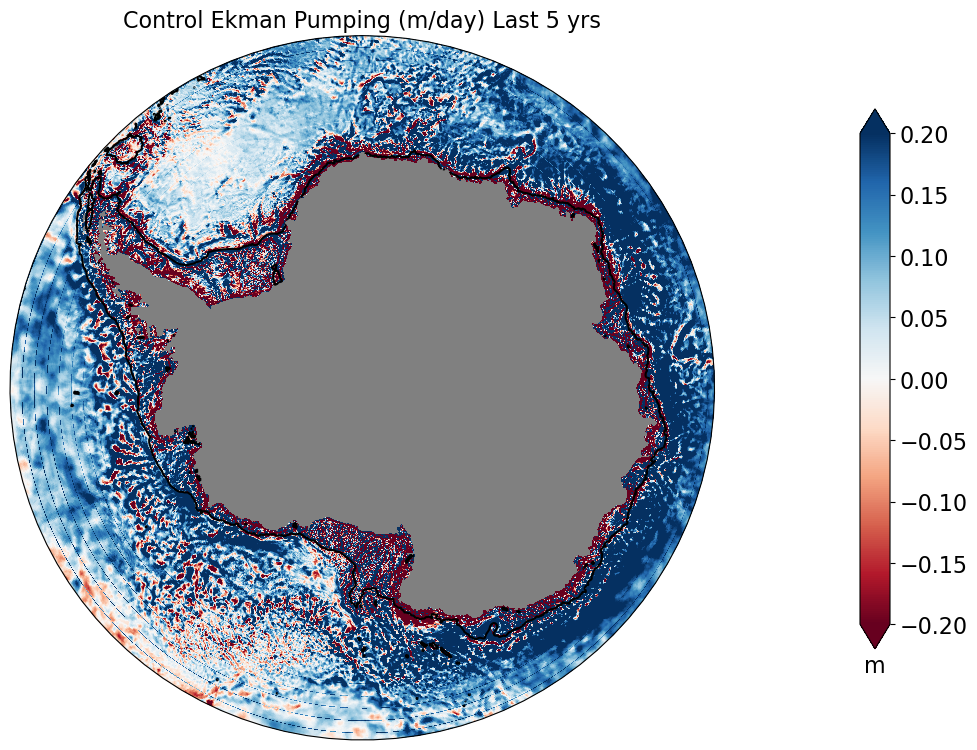

In [18]:
fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(1,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([-280, 80, -80, -60], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

a=we_con_xgcm

p1 = a.plot.pcolormesh(x='xt_ocean', y='yt_ocean',vmin=-.2, vmax=.2, add_colorbar=False, cmap=plt.cm.RdBu, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=[1000], colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

#av=tauy_con
#au=taux_con

#p2=ax.quiver(xt_ocean.values, yt_ocean[0:740].values, au.values, av.values,regrid_shape=50,transform=ccrs.PlateCarree())

tit='Control Ekman Pumping (m/day) Last 5 yrs'
plt.title(tit,fontsize = 16)

#rect = [left, bottom, width, height]
ax_cb = plt.axes([.55, 0.35, 0.015, 0.3])
cb = plt.colorbar(p1,cax=ax_cb,orientation='vertical', extend='both', shrink=0.5)
cb.ax.set_xlabel('m',fontsize=16);
cb.ax.tick_params(labelsize=16) 
    
plt.tight_layout()

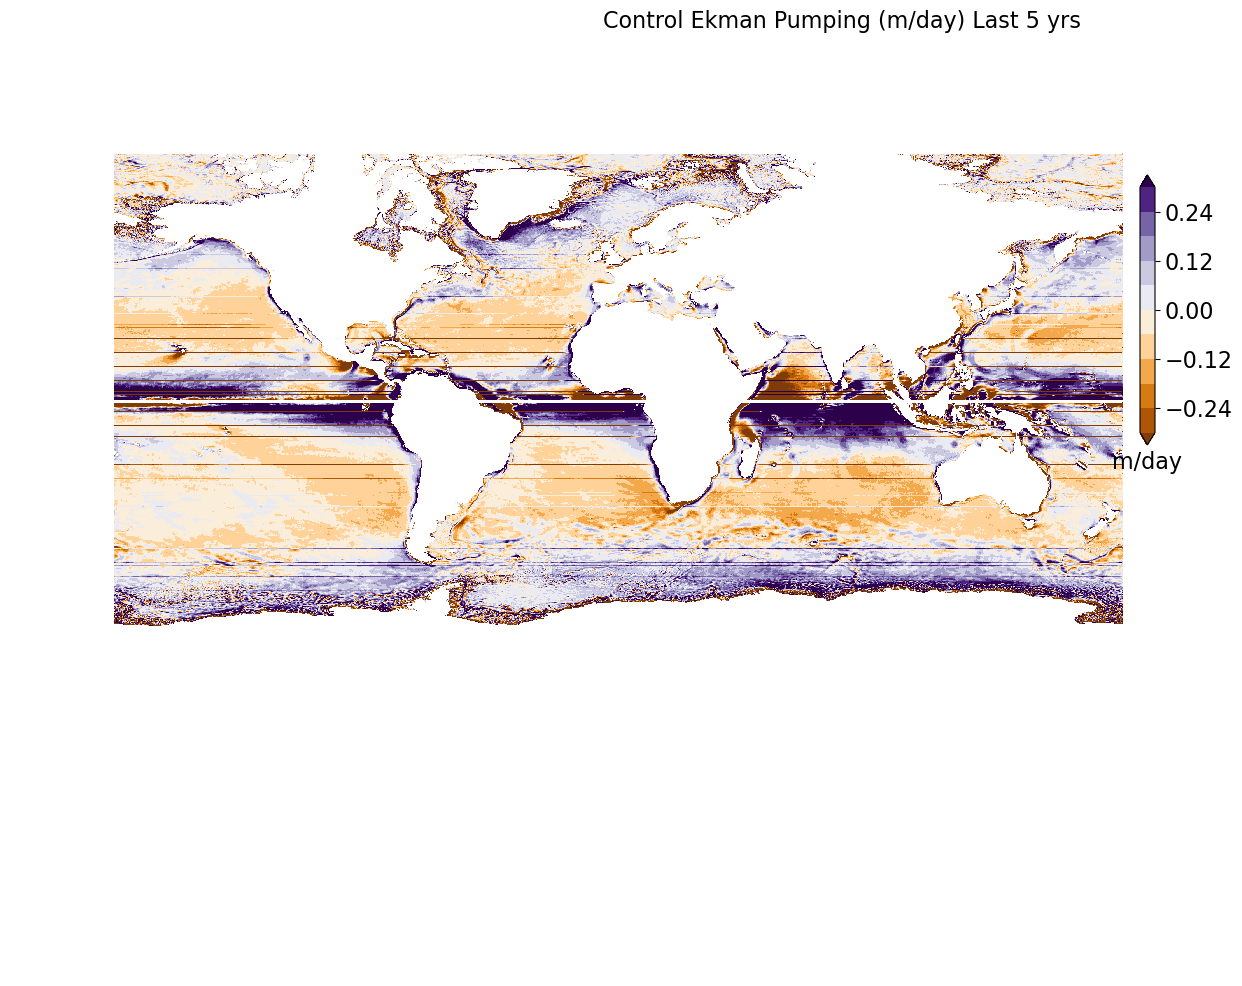

In [38]:
#global fig 3 here: https://www.sciencedirect.com/science/article/pii/S1463500318303779?via%3Dihub#tbl0001
clev = np.arange(-.30,.36,.06)
#clev2 = np.arange(-.5,.6,.1)

fig = plt.figure(figsize=(10, 9))
    
projection=ccrs.Miller()

ax = plt.subplot(1,1,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([-280, 80, -80, 90])
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

a=we_con_xgcm

p1 = a.plot.pcolormesh(x='xt_ocean', y='yt_ocean',vmin=-.30, vmax=.30, levels=clev,add_colorbar=False, cmap=plt.cm.PuOr, extend='both')
#p2 = ht.plot.contour(ax=ax,
#                       x='xt_ocean', y='yt_ocean', levels=[1000], colors='k',linewidth=1)

#av=tauy_con
#au=taux_con

#p2=ax.quiver(xt_ocean.values, yt_ocean[0:740].values, au.values, av.values,regrid_shape=50,transform=ccrs.PlateCarree())

tit='Control Ekman Pumping (m/day) Last 5 yrs'
plt.title(tit,fontsize = 16)

#rect = [left, bottom, width, height]
ax_cb = plt.axes([.95, 0.5, 0.015, 0.3])
cb = plt.colorbar(p1,cax=ax_cb,orientation='vertical', extend='both', shrink=0.5)
cb.ax.set_xlabel('m/day',fontsize=16);
cb.ax.tick_params(labelsize=16) 
    
plt.tight_layout()

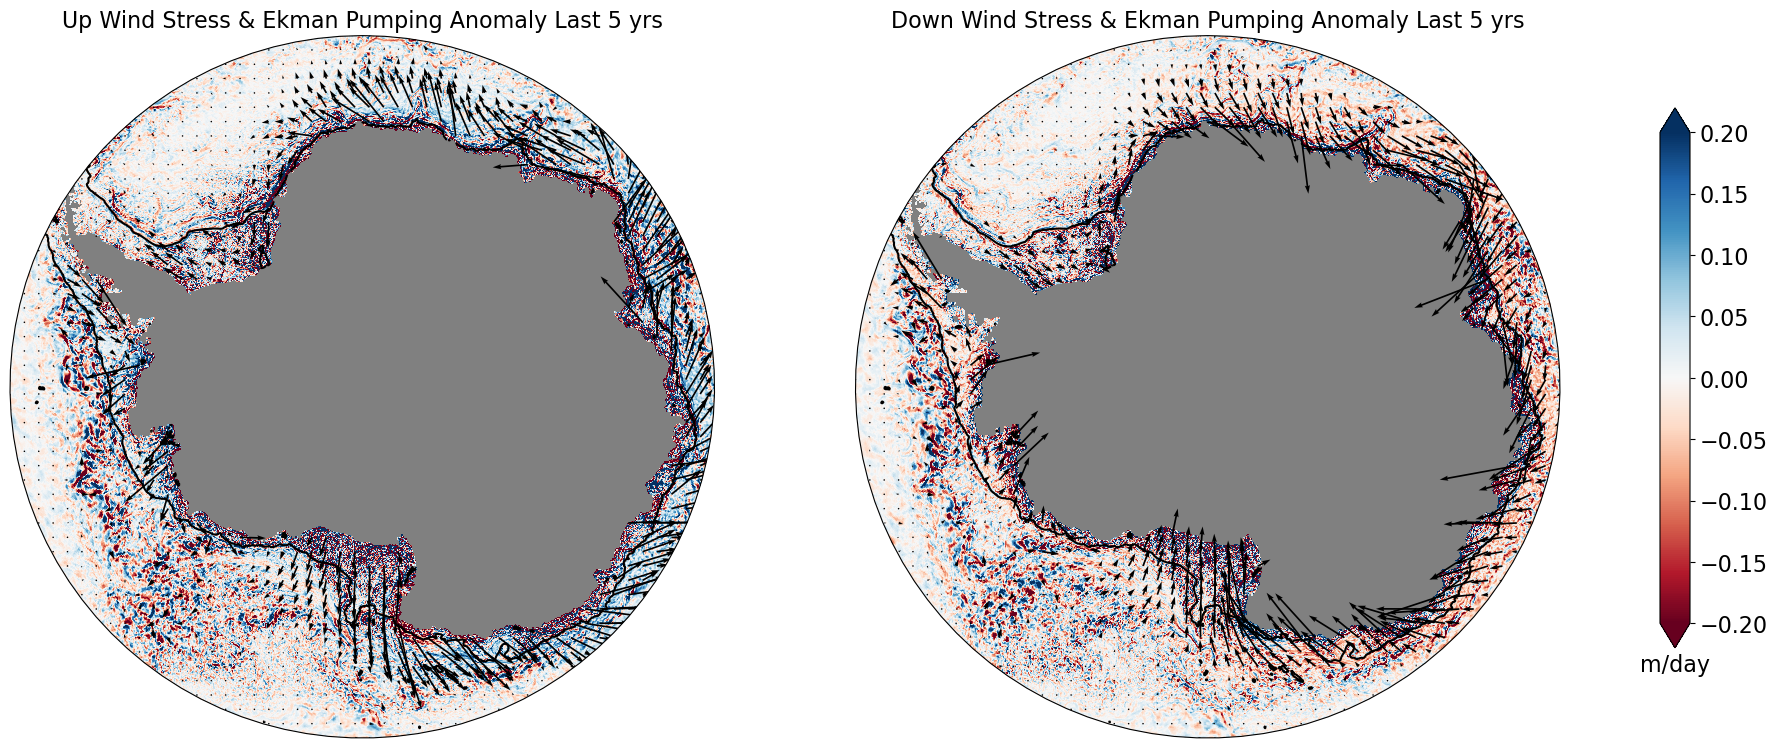

In [18]:
fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(1,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([-280, 80, -80, -63], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

a=we_up_xgcm-we_con_xgcm

p1 = a.plot.pcolormesh(x='xt_ocean', y='yt_ocean',vmin=-.2, vmax=.2, add_colorbar=False, cmap=plt.cm.RdBu, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=[1000], colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

av=tauy_up-tauy_con
au=taux_up-taux_con

p2=ax.quiver(xt_ocean.values, yt_ocean[0:740].values, au.values, av.values,regrid_shape=50,transform=ccrs.PlateCarree())

tit='Up Wind Stress & Ekman Pumping Anomaly Last 5 yrs'
plt.title(tit,fontsize = 16)

ax = plt.subplot(1,2,2, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([-280, 80, -80, -63], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

a=we_dwn_xgcm-we_con_xgcm
    
p1 = a.plot.pcolormesh(x='xt_ocean', y='yt_ocean',vmin=-.2, vmax=.2, add_colorbar=False, cmap=plt.cm.RdBu, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=[1000], colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

av=tauy_dwn-tauy_con
au=taux_dwn-taux_con

p2=ax.quiver(xt_ocean.values, yt_ocean[0:740].values, au.values, av.values,regrid_shape=50,transform=ccrs.PlateCarree())

tit='Down Wind Stress & Ekman Pumping Anomaly Last 5 yrs'
plt.title(tit,fontsize = 16)

#rect = [left, bottom, width, height]
ax_cb = plt.axes([.95, 0.35, 0.015, 0.3])
cb = plt.colorbar(p1,cax=ax_cb,orientation='vertical', extend='both', shrink=0.5)
cb.ax.set_xlabel('m/day',fontsize=16);
cb.ax.tick_params(labelsize=16) 
    
plt.tight_layout()

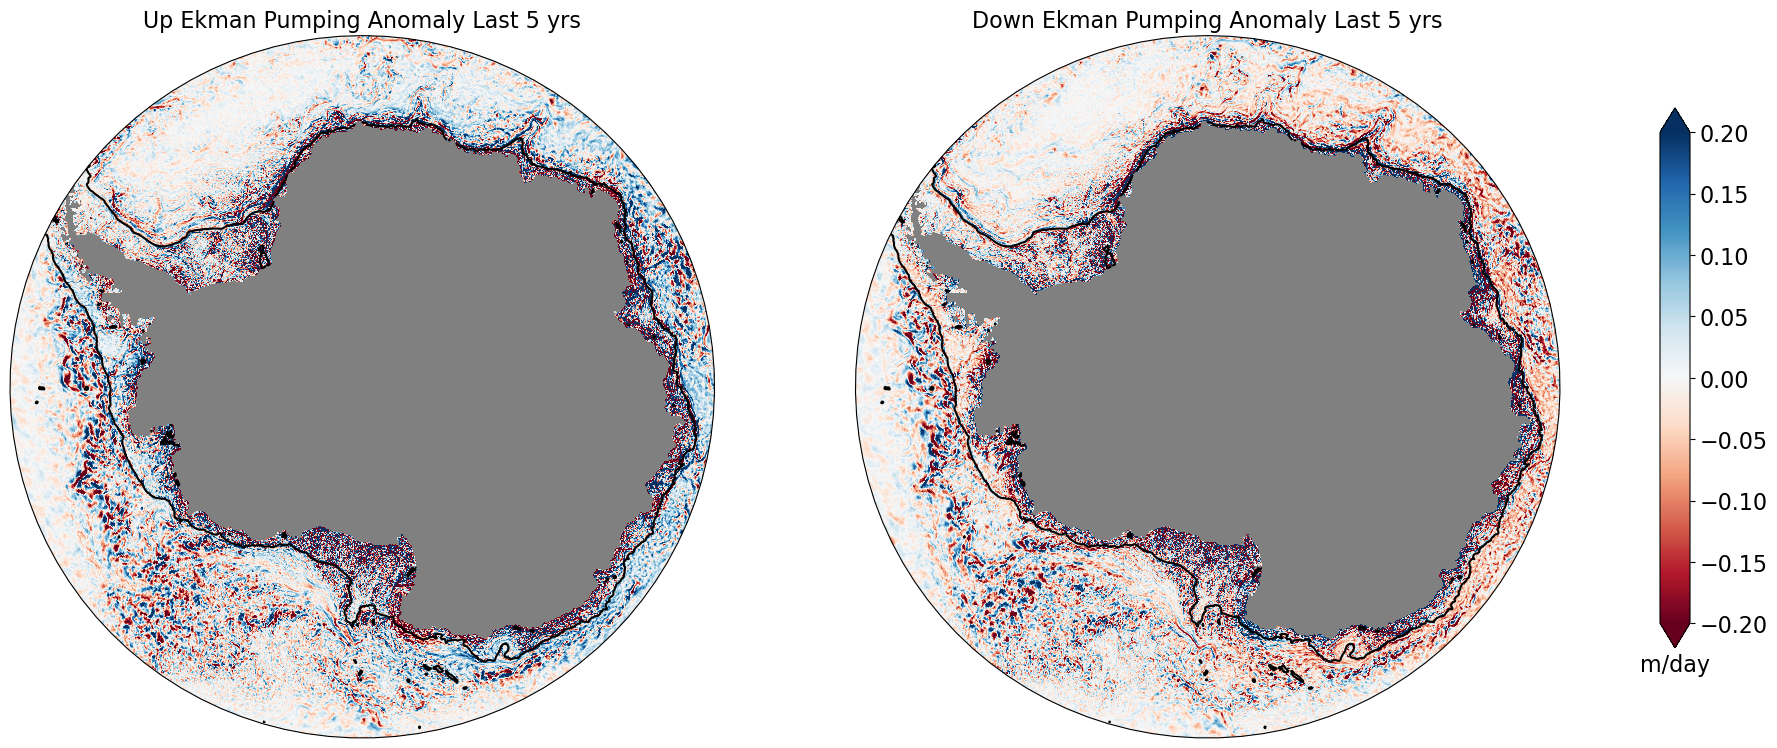

In [19]:
fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(1,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([-280, 80, -80, -63], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

a=we_up_xgcm-we_con_xgcm

p1 = a.plot.pcolormesh(x='xt_ocean', y='yt_ocean',vmin=-.2, vmax=.2, add_colorbar=False, cmap=plt.cm.RdBu, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=[1000], colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

tit='Up Ekman Pumping Anomaly Last 5 yrs'
plt.title(tit,fontsize = 16)

ax = plt.subplot(1,2,2, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([-280, 80, -80, -63], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

a=we_dwn_xgcm-we_con_xgcm
    
p1 = a.plot.pcolormesh(x='xt_ocean', y='yt_ocean',vmin=-.2, vmax=.2, add_colorbar=False, cmap=plt.cm.RdBu, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=[1000], colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

tit='Down Ekman Pumping Anomaly Last 5 yrs'
plt.title(tit,fontsize = 16)

#rect = [left, bottom, width, height]
ax_cb = plt.axes([.95, 0.35, 0.015, 0.3])
cb = plt.colorbar(p1,cax=ax_cb,orientation='vertical', extend='both', shrink=0.5)
cb.ax.set_xlabel('m/day',fontsize=16);
cb.ax.tick_params(labelsize=16) 
    
plt.tight_layout()

In [20]:
#regrid to smooth
#https://cosima-recipes.readthedocs.io/en/latest/documented_examples/Regridding.html#gallery-documented-examples-regridding-ipynb
grid010 = xr.open_dataset('/g/data/ik11/grids/ocean_grid_01.nc')
grid010 = grid010.rename({'grid_x_C': 'xu_ocean', 'grid_y_C': 'yu_ocean',
                          'grid_x_T': 'xt_ocean', 'grid_y_T': 'yt_ocean'})



In [21]:
we_up_xgcm = we_up_xgcm.assign_coords({'geolat_t': grid010.geolat_t, 'geolon_t': grid010.geolon_t})
we_up_xgcm = we_up_xgcm.rename({'xt_ocean': 'x', 'yt_ocean': 'y',
                          'geolon_t': 'longitude', 'geolat_t': 'latitude'})
we_up_xgcm

we_dwn_xgcm = we_dwn_xgcm.assign_coords({'geolat_t': grid010.geolat_t, 'geolon_t': grid010.geolon_t})
we_dwn_xgcm = we_dwn_xgcm.rename({'xt_ocean': 'x', 'yt_ocean': 'y',
                          'geolon_t': 'longitude', 'geolat_t': 'latitude'})
we_dwn_xgcm

we_con_xgcm = we_con_xgcm.assign_coords({'geolat_t': grid010.geolat_t, 'geolon_t': grid010.geolon_t})
we_con_xgcm = we_con_xgcm.rename({'xt_ocean': 'x', 'yt_ocean': 'y',
                          'geolon_t': 'longitude', 'geolat_t': 'latitude'})
we_con_xgcm



<xarray.DataArray 'Ekman Pumping' (y: 2700, x: 3600)>
dask.array<mul, shape=(2700, 3600), dtype=float64, chunksize=(2699, 3598), chunktype=numpy.ndarray>
Coordinates:
  * y          (y) float64 -81.11 -81.07 -81.02 -80.98 ... 89.89 89.94 89.98
  * x          (x) float64 -279.9 -279.8 -279.7 -279.6 ... 79.75 79.85 79.95
    latitude   (y, x) float64 ...
    longitude  (y, x) float64 ...
Attributes:
    long_name:  Ekman Pumping, (d(Tau_y/f) /dx - d(Tau_x/f) / dy) /rho_0
    units:      m/day

In [22]:
#5 degx5deg grid
ds_out = xesmf.util.grid_global(5, 5)
ds_out = ds_out.drop({'lon_b', 'lat_b'})

# let's shift our longitude grid so that it spans [-280, 80] instead [-180, 180]
# this is just for plotting purposes so that the seam is in the Indian Ocean
# rather than in the middle of the Pacific Ocean
ds_out = ds_out.assign_coords({'lon': ds_out.lon - 100.})

ds_out = ds_out.rename({'lon': 'longitude', 'lat': 'latitude'})
ds_out

<xarray.Dataset>
Dimensions:    (x: 72, y: 36)
Coordinates:
    longitude  (y, x) float64 -277.5 -272.5 -267.5 -262.5 ... 67.5 72.5 77.5
    latitude   (y, x) float64 -87.5 -87.5 -87.5 -87.5 ... 87.5 87.5 87.5 87.5
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [23]:
#wf='bilinear_tracer_weights_in010degACCESSOM2_out1deg.nc'
wf='bilinear_tracer_weights_in010degACCESSOM2_out5deg.nc'
ds_in_010deg = we_up_xgcm.drop({'x', 'y'})

regridder_010degACCESSOM2_5deg = xesmf.Regridder(ds_in_010deg, ds_out, 'bilinear', periodic=True,
                                                 filename=wf,reuse_weights=os.path.exists('wf'))
regridder_010degACCESSOM2_5deg

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_tracer_weights_in010degACCESSOM2_out5deg.nc 
Reuse pre-computed weights? False 
Input grid shape:           (2700, 3600) 
Output grid shape:          (36, 72) 
Periodic in longitude?      True

In [24]:
we_up_regridded = regridder_010degACCESSOM2_5deg(we_up_xgcm.chunk({'x': None, 'y': None}))
we_up_regridded = we_up_regridded.assign_coords({'x': ds_out.longitude[0, :], 'y': ds_out.latitude[:, 0]})
we_up_regridded = we_up_regridded.rename({'x': 'longitude', 'y': 'latitude'})

In [25]:
we_dwn_regridded = regridder_010degACCESSOM2_5deg(we_dwn_xgcm.chunk({'x': None, 'y': None}))
we_dwn_regridded = we_dwn_regridded.assign_coords({'x': ds_out.longitude[0, :], 'y': ds_out.latitude[:, 0]})
we_dwn_regridded = we_dwn_regridded.rename({'x': 'longitude', 'y': 'latitude'})

In [26]:
we_con_regridded = regridder_010degACCESSOM2_5deg(we_con_xgcm.chunk({'x': None, 'y': None}))
we_con_regridded = we_con_regridded.assign_coords({'x': ds_out.longitude[0, :], 'y': ds_out.latitude[:, 0]})
we_con_regridded = we_con_regridded.rename({'x': 'longitude', 'y': 'latitude'})

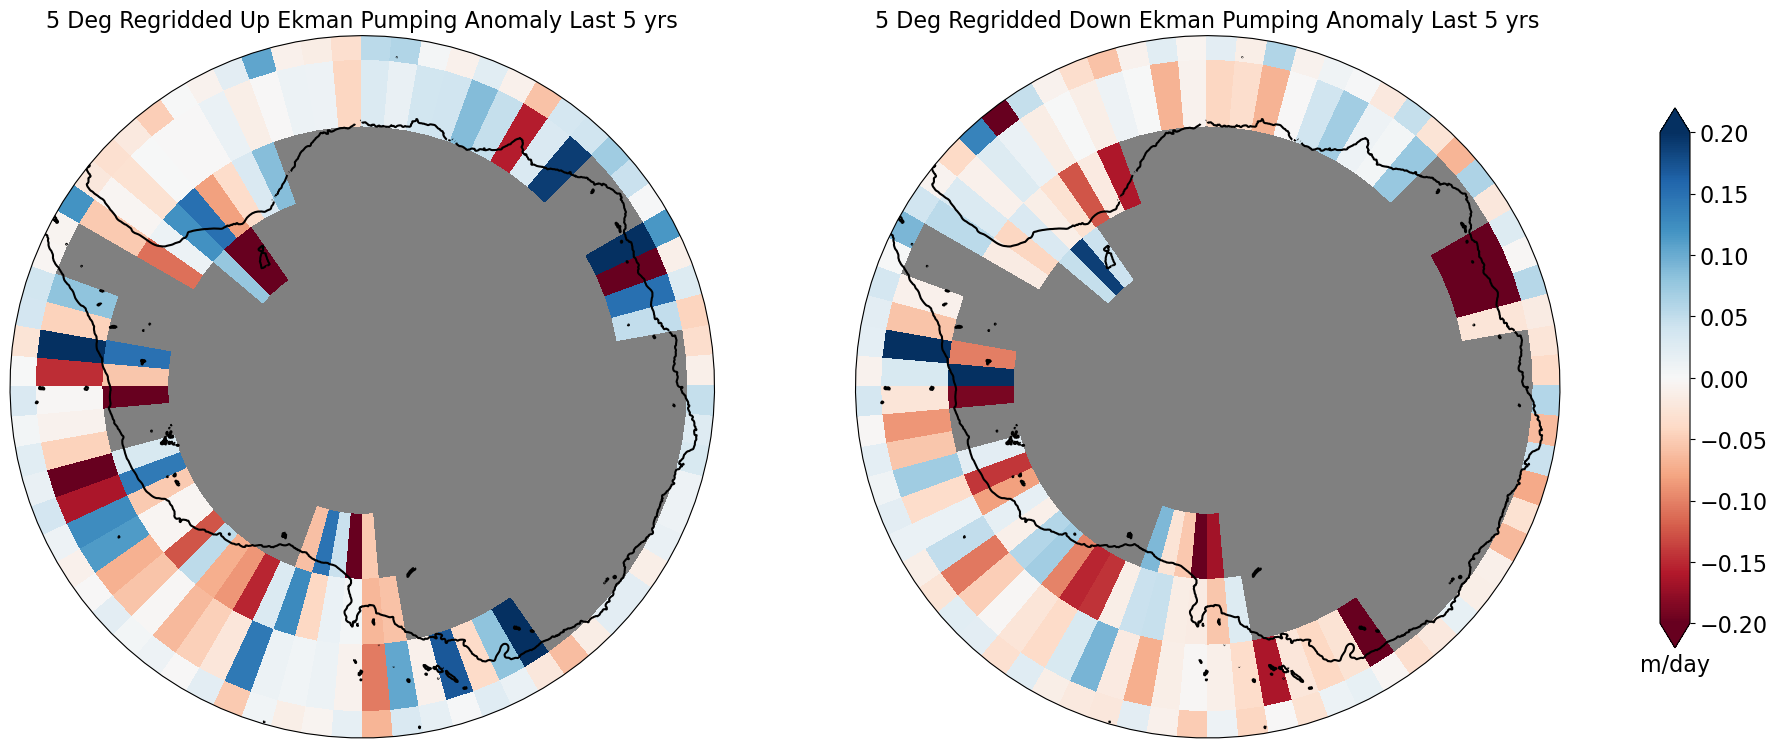

In [27]:
fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(1,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([-280, 80, -80, -63], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

a=we_up_regridded-we_con_regridded

p1 = a.plot.pcolormesh(x='longitude', y='latitude',vmin=-.2, vmax=.2, add_colorbar=False, cmap=plt.cm.RdBu, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=[1000], colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

tit='5 Deg Regridded Up Ekman Pumping Anomaly Last 5 yrs'
plt.title(tit,fontsize = 16)

ax = plt.subplot(1,2,2, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([-280, 80, -80, -63], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

a=we_dwn_regridded-we_con_regridded

p1 = a.plot.pcolormesh(x='longitude', y='latitude',vmin=-.2, vmax=.2, add_colorbar=False, cmap=plt.cm.RdBu, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=[1000], colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

tit='5 Deg Regridded Down Ekman Pumping Anomaly Last 5 yrs'
plt.title(tit,fontsize = 16)

#rect = [left, bottom, width, height]
ax_cb = plt.axes([.95, 0.35, 0.015, 0.3])
cb = plt.colorbar(p1,cax=ax_cb,orientation='vertical', extend='both', shrink=0.5)
cb.ax.set_xlabel('m/day',fontsize=16);
cb.ax.tick_params(labelsize=16) 
    
plt.tight_layout()

In [28]:
#1 degx1deg grid
ds_out = xesmf.util.grid_global(1, 1)
ds_out = ds_out.drop({'lon_b', 'lat_b'})

# let's shift our longitude grid so that it spans [-280, 80] instead [-180, 180]
# this is just for plotting purposes so that the seam is in the Indian Ocean
# rather than in the middle of the Pacific Ocean
ds_out = ds_out.assign_coords({'lon': ds_out.lon - 100.})

ds_out = ds_out.rename({'lon': 'longitude', 'lat': 'latitude'})
ds_out

<xarray.Dataset>
Dimensions:    (x: 360, y: 180)
Coordinates:
    longitude  (y, x) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
    latitude   (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [29]:
#wf='bilinear_tracer_weights_in010degACCESSOM2_out5deg.nc'
wf='bilinear_tracer_weights_in010degACCESSOM2_out1deg.nc'
ds_in_010deg = we_up_xgcm.drop({'x', 'y'})

regridder_010degACCESSOM2_1deg = xesmf.Regridder(ds_in_010deg, ds_out, 'bilinear', periodic=True,
                                                 filename=wf,reuse_weights=os.path.exists('wf'))
regridder_010degACCESSOM2_1deg

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_tracer_weights_in010degACCESSOM2_out1deg.nc 
Reuse pre-computed weights? False 
Input grid shape:           (2700, 3600) 
Output grid shape:          (180, 360) 
Periodic in longitude?      True

In [30]:
we_up_regridded = regridder_010degACCESSOM2_1deg(we_up_xgcm.chunk({'x': None, 'y': None}))
we_up_regridded = we_up_regridded.assign_coords({'x': ds_out.longitude[0, :], 'y': ds_out.latitude[:, 0]})
we_up_regridded = we_up_regridded.rename({'x': 'longitude', 'y': 'latitude'})

In [31]:
we_dwn_regridded = regridder_010degACCESSOM2_1deg(we_dwn_xgcm.chunk({'x': None, 'y': None}))
we_dwn_regridded = we_dwn_regridded.assign_coords({'x': ds_out.longitude[0, :], 'y': ds_out.latitude[:, 0]})
we_dwn_regridded = we_dwn_regridded.rename({'x': 'longitude', 'y': 'latitude'})

In [32]:
we_con_regridded = regridder_010degACCESSOM2_1deg(we_con_xgcm.chunk({'x': None, 'y': None}))
we_con_regridded = we_con_regridded.assign_coords({'x': ds_out.longitude[0, :], 'y': ds_out.latitude[:, 0]})
we_con_regridded = we_con_regridded.rename({'x': 'longitude', 'y': 'latitude'})

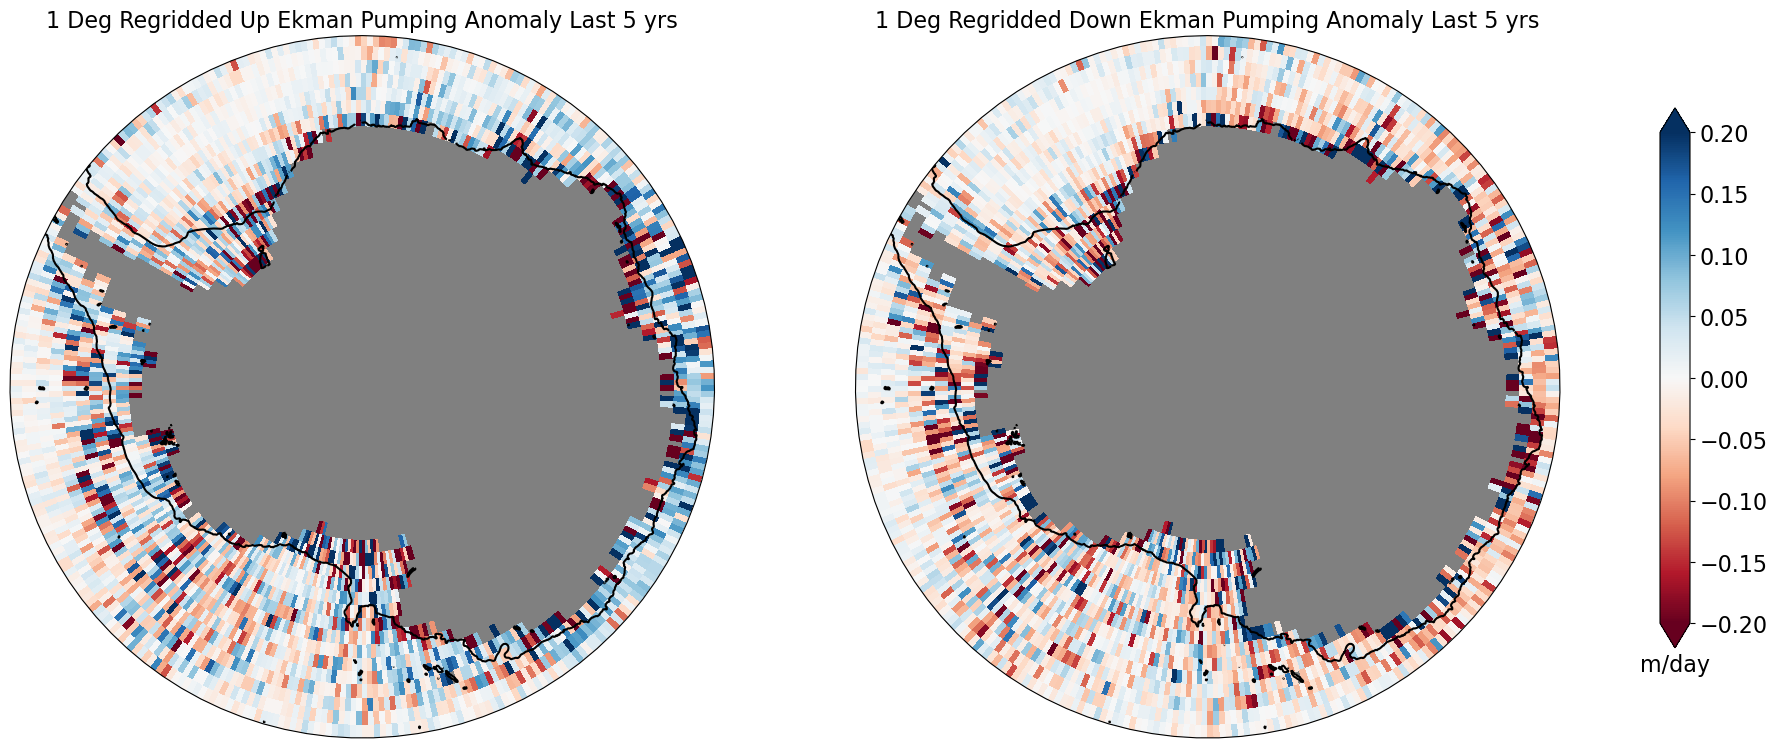

In [33]:
fig = plt.figure(figsize=(20, 18))
    
projection=ccrs.SouthPolarStereo()

ax = plt.subplot(1,2,1, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([-280, 80, -80, -63], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

a=we_up_regridded-we_con_regridded

p1 = a.plot.pcolormesh(x='longitude', y='latitude',vmin=-.2, vmax=.2, add_colorbar=False, cmap=plt.cm.RdBu, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=[1000], colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

tit='1 Deg Regridded Up Ekman Pumping Anomaly Last 5 yrs'
plt.title(tit,fontsize = 16)

ax = plt.subplot(1,2,2, projection=projection)
ax.patch.set_color('.5')

ax.set_extent([-280, 80, -80, -63], crs=ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

a=we_dwn_regridded-we_con_regridded

p1 = a.plot.pcolormesh(x='longitude', y='latitude',vmin=-.2, vmax=.2, add_colorbar=False, cmap=plt.cm.RdBu, extend='both', transform=ccrs.PlateCarree())
p2 = ht.plot.contour(ax=ax,
                       x='xt_ocean', y='yt_ocean', levels=[1000], colors='k',linewidth=1,
                       transform=ccrs.PlateCarree())

tit='1 Deg Regridded Down Ekman Pumping Anomaly Last 5 yrs'
plt.title(tit,fontsize = 16)

#rect = [left, bottom, width, height]
ax_cb = plt.axes([.95, 0.35, 0.015, 0.3])
cb = plt.colorbar(p1,cax=ax_cb,orientation='vertical', extend='both', shrink=0.5)
cb.ax.set_xlabel('m/day',fontsize=16);
cb.ax.tick_params(labelsize=16) 
    
plt.tight_layout()